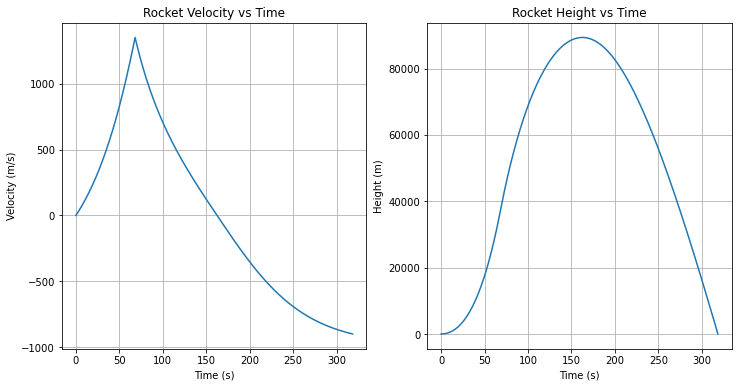

Maximum height: 89366.23 m
Maximum velocity: 1351.24 m/s
Time to reach terminal velocity: 162.60 s


In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants and parameters
M = 13118.0      # Total mass of the rocket (kg)
Mr = 4268.0      # Mass of the rocket without fuel (kg)
rho = 1.22       # Density of air (kg/m^3)
C = 0.125        # Drag coefficient
d = 1.70         # Diameter of the rocket (m)
A = math.pi*(d/2)**2 / 4.0  # Cross-sectional area of the rocket (m^2)
g = 9.81         # Acceleration due to gravity (m/s^2)
ve = 2000.0      # Ejection velocity of the rocket (m/s)
dm_dt = 130.0    # Mass flow rate of the rocket (kg/s)

# Initial conditions
t0 = 0.0         # Initial time (s)
h0 = 0.0         # Initial height (m)
v0 = 0.0         # Initial velocity (m/s)
m0 = M           # Initial mass (kg)



def forces(t, h, v, m, dt):
    """
    Calculates the forces acting on the rocket at a given time step.

    Parameters:
    -----------
    t: float
        Current time
    h: float
        Current height of the rocket
    v: float
        Current velocity of the rocket
    m: float
        Current mass of the rocket
    dt: float
        Time step

    Returns:
    --------
    Fg: float
        Force due to gravity
    Fdrag: float
        Drag force
    Fthrust: float
        Thrust force
    m: float
        Updated mass of the rocket
    """
    Fg = m*g
    Fdrag = 0.5*rho*v**2*C*A
    if m > Mr:
        Fthrust = ve*dm_dt
        m -= dm_dt*dt
        if m < Mr:
            m = Mr
    else:
        Fthrust = 0.0
    return Fg, Fdrag, Fthrust, m



def simulate_rocket(dt, t_max):
    """
    Uses Euler's method to simulate the rocket trajectory over a specified time range.

    Parameters:
    -----------
    dt: float
        Time step
    t_max: float
        Maximum time for the simulation

    Returns:
    --------
    h_max: float
        Maximum height of the rocket
    v_max: float
        Maximum velocity of the rocket
    t_terminal: float
        Time to reach terminal velocity of the rocket
    """
    t = np.arange(t0, t_max, dt)
    h = np.zeros_like(t)
    v = np.zeros_like(t)
    m = np.zeros_like(t)
    h[0] = h0
    v[0] = v0
    m[0] = m0
    i = 0
    
    "4 stages of the rocket launch"
    # (i) Launching from the ground
    while m[i] > Mr:
        Fg, Fdrag, Fthrust, m[i+1] = forces(t[i], h[i], v[i], m[i], dt)
        a = (Fthrust - Fg - Fdrag)/m[i+1]
        v[i+1] = v[i] + a*dt
        h[i+1] = h[i] + v[i]*dt
        i += 1
    # (ii) Ascending with its fuel and total mass M reducing with time
    while m[i] > Mr:
        Fg, Fdrag, Fthrust, m[i+1] = forces(t[i], h[i], v[i], m[i], dt)
        a = (Fthrust - Fg - Fdrag)/m[i+1]
        v[i+1] = v[i] + a*dt
        h[i+1] = h[i] + v[i]*dt
        i += 1
    # (iii) Motion after all its fuel is burned and its mass does not change anymore
    while v[i] > 0:
        Fg, Fdrag, Fthrust, m[i+1] = forces(t[i], h[i], v[i], m[i], dt)
        a = (- Fg - Fdrag)/m[i+1]
        v[i+1] = v[i] + a*dt
        h[i+1] = h[i] + v[i]*dt
        i += 1
    # (iv) Descending until it hits the ground
    while h[i] > 0:
        Fg, Fdrag, Fthrust, m[i+1] = forces(t[i], h[i], v[i], m[i], dt)
        a = (- Fg + Fdrag)/m[i+1]
        v[i+1] = v[i] + a*dt
        h[i+1] = h[i] + v[i]*dt
        i += 1

    h_max = np.max(h)
    v_max = np.max(v)
    t_terminal = t[np.argmin(np.sign(v - np.sqrt(m[-1]*g/(0.5*rho*A*C))))+1]

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(t[:i], v[:i])
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.title('Rocket Velocity vs Time')
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(t[:i], h[:i])
    plt.xlabel('Time (s)')
    plt.ylabel('Height (m)')
    plt.title('Rocket Height vs Time')
    plt.grid()
    plt.show()

    print(f"Maximum height: {h_max:.2f} m")
    print(f"Maximum velocity: {v_max:.2f} m/s")
    print(f"Time to reach terminal velocity: {t_terminal:.2f} s")

dt = 0.1
t_max = 500
simulate_rocket(dt, t_max)

#The lower atmospheric density on Mars compared to Earth would result in less air resistance acting on the rocket
#,allowing it to reach a higher maximum altitude and velocity. However, the weaker gravitational acceleration on 
#Mars would result in a slower ascent and lower maximum velocity compared to Earth. These differences would be 
#reflected in the shape and slope of the velocity and height vs time graphs, with a less steep slope and lower 
#maximum velocity on the velocity graph, and a higher peak on the height graph for the simulation on Mars 
#compared to Earth.
